# Data Visualization using Python

Data visualization (Dataviz) using Python libraries: Matplotlib and Seaborn.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Graph 1

Create a graph with two axes. The x-axis goes from 0 to 50 and is called "x-axis". The y-axis is labeled "y-axis".
Draw the line of equation: x = 3y. With x ranging from 0 to 50.
The graph has the following title "Draw a straight line" and the line is red.

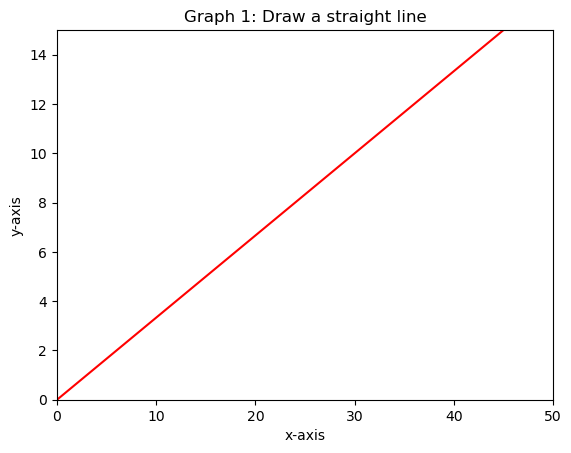

In [2]:
# Define x and y (line of equation x = 3y)
y = np.linspace(0, 15, 20)
x = 3 * y

# Create a new figure and axes, plot the line
fig, ax = plt.subplots()
ax.plot(x, y, 'r-')

# Set parameters title, labels and limits
ax.set(title='Graph 1: Draw a straight line',
        xlabel='x-axis',
        ylabel='y-axis',
        xlim=[0,50],
        ylim=[0,15])

# Save and show the graph
plt.savefig('Graphs/graph1.png')
plt.show()

## Sales of a cosmetics company
For the following graphs, we will use the sales data from a cosmetics company, from the file "company_sales_data.csv".  

In [3]:
# Import the csv file and display the saved dataframe
company_sales_data = pd.read_csv("./data/company_sales_data.csv")
company_sales_data

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


### Graph 2

First, we want a graph that gives the curve of total profit realized per month.

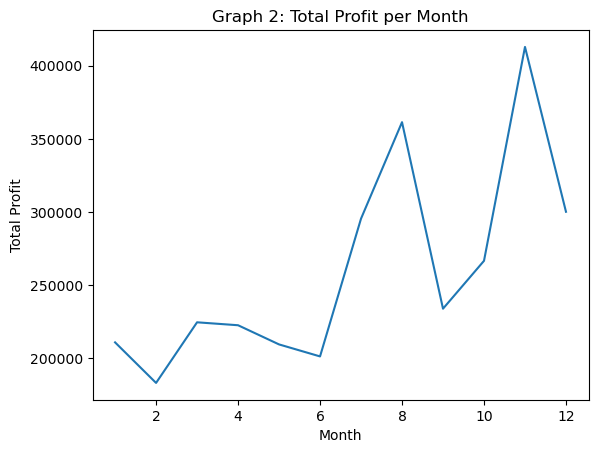

In [4]:
# Extract the month and total profit columns
months = company_sales_data['month_number']
profits = company_sales_data['total_profit']

fig, ax = plt.subplots()
ax.plot(months, profits)

ax.set(title='Graph 2: Total Profit per Month',
        xlabel='Month',
        ylabel='Total Profit')

plt.savefig('graphs/graph2.png')
plt.show()

### Graph 3
Next, we want a graph that gives the profit curve for each product, as a function of time.
Each curve will have a different color and we want a legend that indicates which color corresponds to which product.

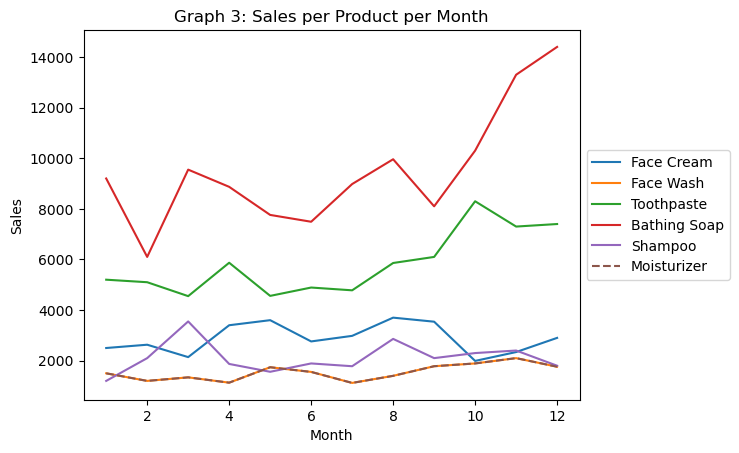

In [5]:
# Extract the sales columns for each product
facecream_sales = company_sales_data['facecream']
facewash_sales = company_sales_data['facewash']
toothpaste_sales = company_sales_data['toothpaste']
bathingsoap_sales = company_sales_data['bathingsoap']
shampoo_sales = company_sales_data['shampoo']
moisturizer_sales = company_sales_data['moisturizer']

fig, ax = plt.subplots()

ax.plot(months, facecream_sales, label='Face Cream')
ax.plot(months, facewash_sales, label='Face Wash')
ax.plot(months, toothpaste_sales, label='Toothpaste')
ax.plot(months, bathingsoap_sales, label='Bathing Soap')
ax.plot(months, shampoo_sales, label='Shampoo')
ax.plot(months, moisturizer_sales, '--', label='Moisturizer')

ax.set(title='Graph 3: Sales per Product per Month',
        xlabel='Month',
        ylabel='Sales')

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('graphs/graph3.png')
plt.show()

### Graph 4
We want a graph that compares, each month, the number of units sold for each product. It's up to you to choose the best representation to know the best-selling product per month.

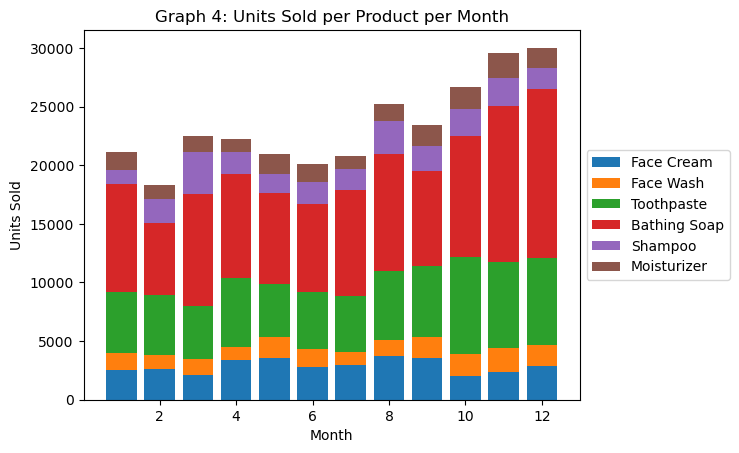

In [6]:
# Compute the total number of units sold each month
total_units = company_sales_data['total_units']

fig, ax = plt.subplots()

ax.bar(months, facecream_sales, label='Face Cream', color='tab:blue')
ax.bar(months, facewash_sales, bottom=facecream_sales, label='Face Wash', color='tab:orange')
ax.bar(months, toothpaste_sales, bottom=facecream_sales+facewash_sales, label='Toothpaste', color='tab:green')
ax.bar(months, bathingsoap_sales, bottom=facecream_sales+facewash_sales+toothpaste_sales, label='Bathing Soap', color='tab:red')
ax.bar(months, shampoo_sales, bottom=facecream_sales+facewash_sales+toothpaste_sales+bathingsoap_sales, label='Shampoo', color='tab:purple')
ax.bar(months, moisturizer_sales, bottom=facecream_sales+facewash_sales+toothpaste_sales+bathingsoap_sales+shampoo_sales, label='Moisturizer', color='tab:brown')

ax.set(title='Graph 4: Units Sold per Product per Month',
        xlabel='Month',
        ylabel='Units Sold')

ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.savefig('graphs/graph4.png')
plt.show()

### Graph 5
We want a graph that gives the contribution of each product in the total profit (over the year studied). Please add the percentage for each product.

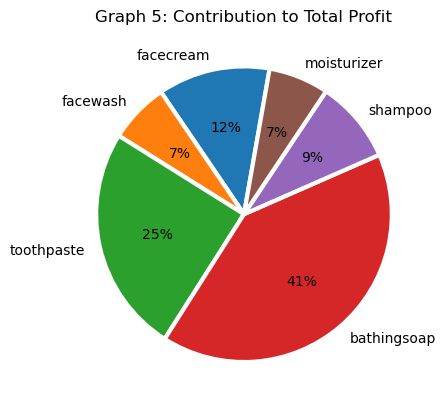

In [7]:
# Calculate the contribution of each product to the total profit
total_profit_per_product = company_sales_data[['facecream', 'facewash', 'toothpaste', 'bathingsoap', 'shampoo', 'moisturizer']].sum()
total_profit = company_sales_data['total_profit'].sum()
profit_contributions = total_profit_per_product / total_profit * 100

colors = {'facecream': 'tab:blue', 'Facewash': 'tab:orange', 'toothpaste': 'tab:green', 'bathingsoap': 'tab:red', 'shampoo': 'tab:purple', 'moisturizer': 'tab:brown'}

plt.pie(profit_contributions, labels=profit_contributions.index, colors=colors.values(), autopct='%1.0f%%', startangle=80, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Graph 5: Contribution to Total Profit')
plt.savefig('graphs/graph5.png')
plt.show()

Display all graphs in one figure

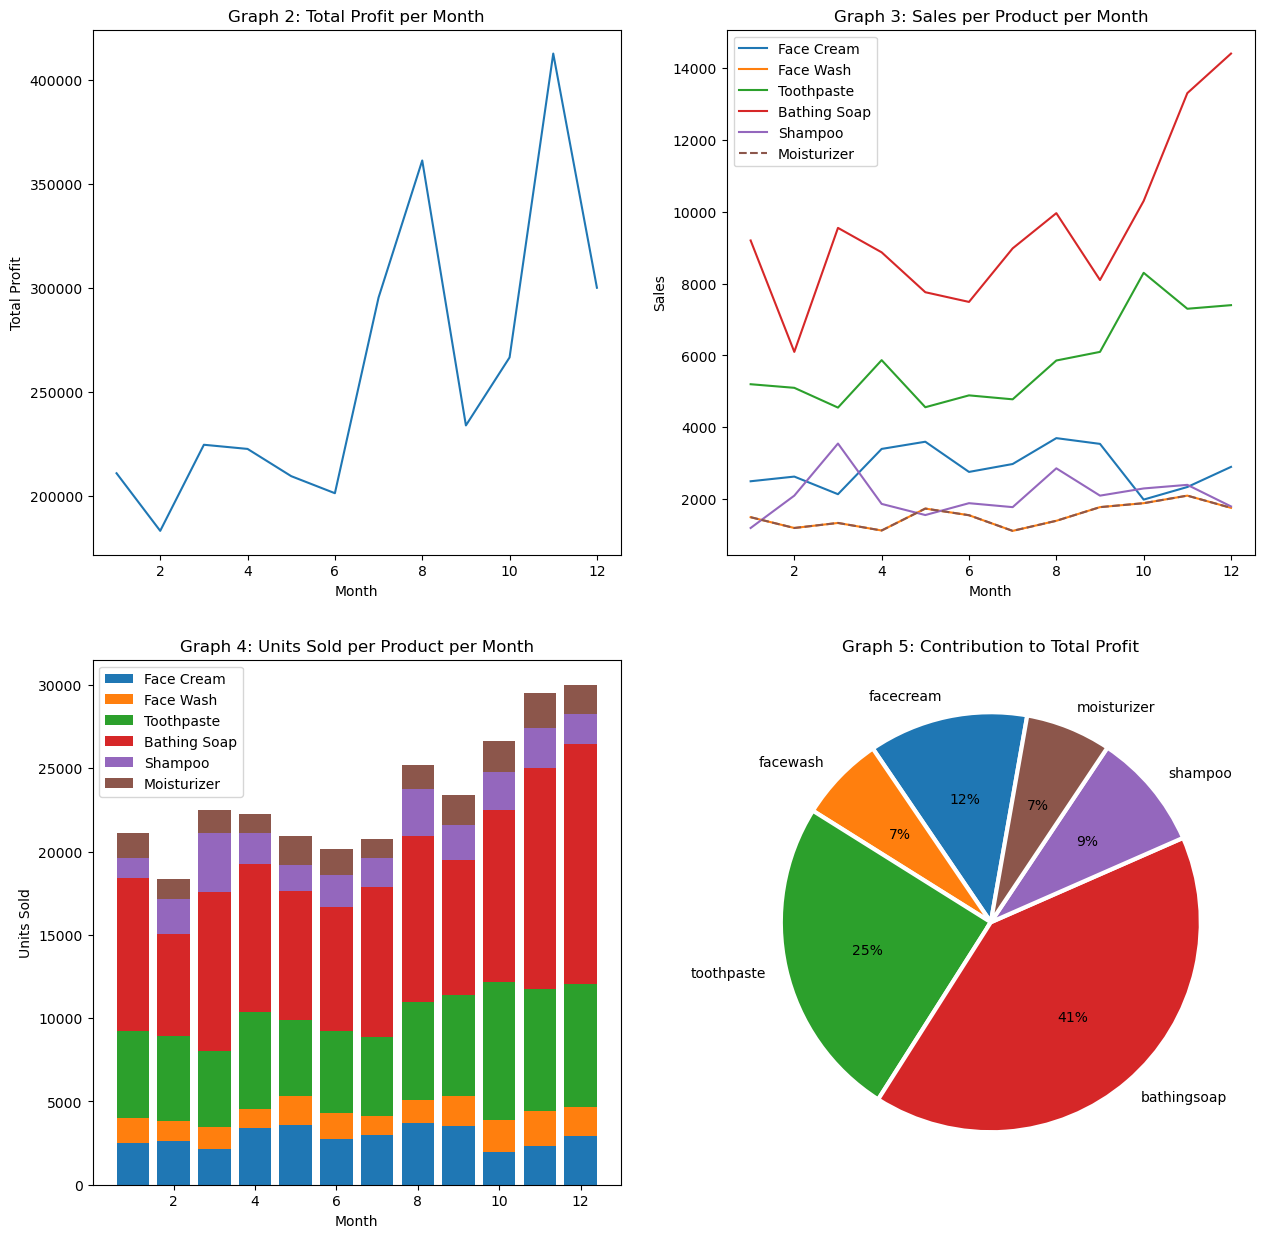

In [8]:
# Figure with 4 subplots
fig, axes = plt.subplots(2,2)
fig.set_size_inches(15,15)

# Graph 2
axes[0,0].plot(months, profits)
axes[0,0].set(title='Graph 2: Total Profit per Month',
        xlabel='Month',
        ylabel='Total Profit')

# Graph 3
axes[0,1].plot(months, facecream_sales, label='Face Cream')
axes[0,1].plot(months, facewash_sales, label='Face Wash')
axes[0,1].plot(months, toothpaste_sales, label='Toothpaste')
axes[0,1].plot(months, bathingsoap_sales, label='Bathing Soap')
axes[0,1].plot(months, shampoo_sales, label='Shampoo')
axes[0,1].plot(months, moisturizer_sales, '--', label='Moisturizer')

axes[0,1].set(title='Graph 3: Sales per Product per Month',
        xlabel='Month',
        ylabel='Sales')
axes[0,1].legend()

# Graph 4
axes[1,0].bar(months, facecream_sales, label='Face Cream', color='tab:blue')
axes[1,0].bar(months, facewash_sales, bottom=facecream_sales, label='Face Wash', color='tab:orange')
axes[1,0].bar(months, toothpaste_sales, bottom=facecream_sales+facewash_sales, label='Toothpaste', color='tab:green')
axes[1,0].bar(months, bathingsoap_sales, bottom=facecream_sales+facewash_sales+toothpaste_sales, label='Bathing Soap', color='tab:red')
axes[1,0].bar(months, shampoo_sales, bottom=facecream_sales+facewash_sales+toothpaste_sales+bathingsoap_sales, label='Shampoo', color='tab:purple')
axes[1,0].bar(months, moisturizer_sales, bottom=facecream_sales+facewash_sales+toothpaste_sales+bathingsoap_sales+shampoo_sales, label='Moisturizer', color='tab:brown')

axes[1,0].set(title='Graph 4: Units Sold per Product per Month',
        xlabel='Month',
        ylabel='Units Sold')
axes[1,0].legend()

# Graph 5
plt.pie(profit_contributions, labels=profit_contributions.index, colors=colors.values(), autopct='%1.0f%%', startangle=80, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Graph 5: Contribution to Total Profit')

plt.savefig('graphs/graph2345.png')
plt.show()

## Bookstore sales data
Now, we are going to change the data source. And we're going to come back to yesterday's project. Ask yourself if yesterday you thought about making graphs. If so, that's great, it shows that it's intuitive to have to visualize certain data. If not, it's normal, we hadn't seen that in the resources yet. Know that from now on, everything will seem easier to you because you will always think of making graphic representations. Thus, get the 3 csv files which give the sales, the list of customers and the list of products.

### Graph 6
First, we want to have a pie chart that gives the distribution of products by category. Please indicate the percentage per product (nb of products of such category / nb of total products).

### Graph 7
We want a graph that gives the evolution of turnover for each category (as a function of time).

### Graph 8
We want a graph that gives a boxplot of the price distribution of a product for each category. Clearly, the graph shows 3 boxplots (one corresponding to category 0, one to category 1 and one to category 2).

### Graph 9
We want a graph that gives the distribution of turnover, for each month, according to the gender of the customer.

### Graph 10
We want a graph which, for each transaction, links the age group of the customer and the amount of the transaction.

### Graph 11
We want a graph which, for each item, links price and number of items sold during the period.

### Graph 12
We want a graph that gives the distribution of the average basket (for each transaction).

### Other graphs
Find 3 other graphs that can be useful in understanding the sales of the bookstore chain.